In [19]:
%matplotlib inline
from IPython.display import Image, HTML
import json
import datetime
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.model_selection import train_test_split
#from xgboost import XGBClassifier, XGBRegressor
from wordcloud import WordCloud, STOPWORDS
import plotly
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import warnings
warnings.filterwarnings('ignore')
#plotly.tools.set_credentials_file(username='rounakbanik', api_key='xTLaHBy9MVv5szF4Pwan')

sns.set_style('whitegrid')
sns.set(font_scale=1.25)
pd.set_option('display.max_colwidth', 50)

In [20]:
df = pd.read_csv('../DataSet/movies_metadata.csv')

In [21]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [22]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [23]:
df.shape

(45466, 24)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [25]:
# Remove useless column imdb_id
df = df.drop(['imdb_id'], axis=1)

In [26]:
df[df['original_title'] != df['title']][['title', 'original_title']]

,title,original_title
28,The City of Lost Children,La Cité des Enfants Perdus
29,Shanghai Triad,摇啊摇，摇到外婆桥
32,Wings of Courage,"Guillaumet, les ailes du courage"
57,The Postman,Il postino
58,The Confessional,Le confessionnal
67,French Twist,Gazon maudit
72,Les Miserables,Les misérables
79,The White Balloon,بادکنک سفید
81,Antonia's Line,Antonia
104,Nobody Loves Me,Keiner liebt mich


In [27]:
# Drop the title with orginal language
df = df.drop('original_title', axis=1)

In [28]:
df[df['revenue'] == 0].shape

(38052, 22)

In [29]:
df['revenue'] = df['revenue'].replace(0, np.nan)

In [30]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(36576, 22)

# Construct 2 features: released year and return

In [31]:
# We have close to 5000 movies for which we have data on revenue and budget ratio. This is close to 10% of the entire dataset. Although this may seem small, this is enough to perform very useful analysis and discover interesting insights about the world of movies.

df['return'] = df['revenue'] / df['budget']
df[df['return'].isnull()].shape

(40085, 23)

In [32]:
df['year'] = pd.to_datetime(df['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [33]:
df['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
 - Written by Ørnås                                                                                                                   1
Name: adult, dtype: int64

In [34]:
# There are close to 0 adult movies in this dataset. The adult feature therefore is not of much use to us and can be safely dropped.
df = df.drop('adult', axis=1)

In [35]:
base_poster_url = 'http://image.tmdb.org/t/p/w185/'
df['poster_path'] = "<img src='" + base_poster_url + df['poster_path'] + "' style='height:100px;'>"

In [36]:
df.shape

(45466, 23)

# Exploratory Data Analysis

### Tile and Overview WordClouds

In [37]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

In [38]:
title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

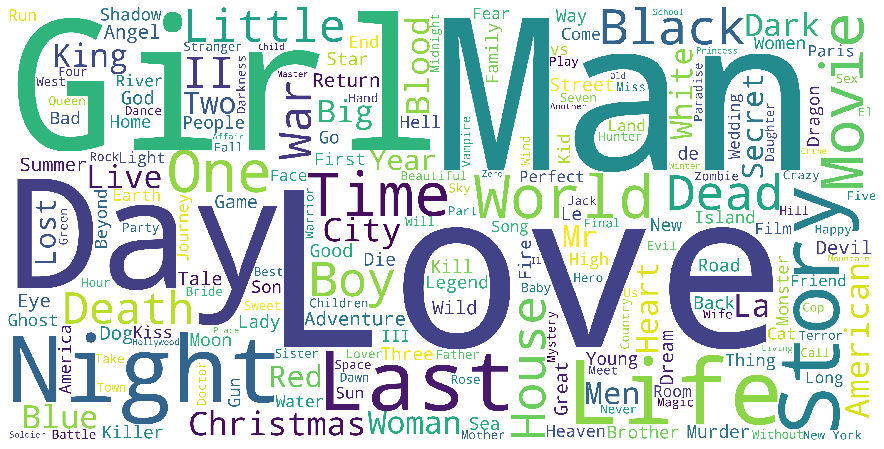

In [39]:
title_wordcloud = WordCloud(stopwords=STOPWORDS,background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.savefig('../images/word_cloud_titles.png')
plt.show()

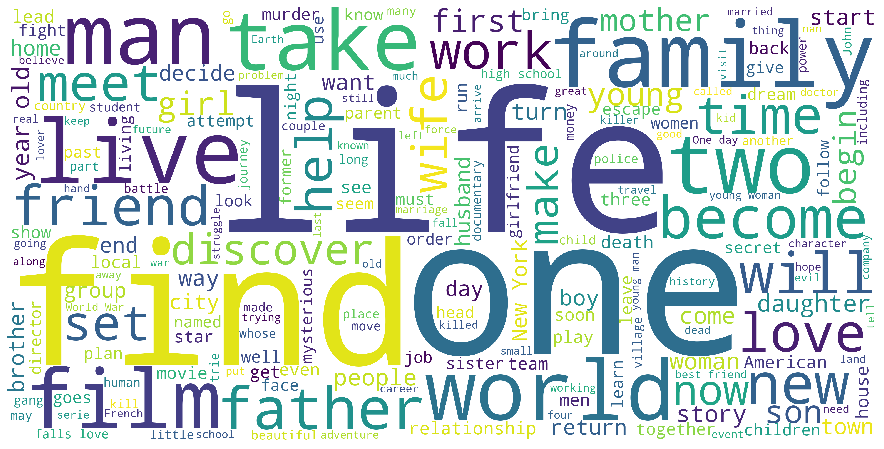

In [40]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.savefig('../images/word_cloud_overviews.png')
plt.show()

### Production Countries

In [93]:
import ast
df['production_countries'] = df['production_countries'].fillna('[]').apply(ast.literal_eval)
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [94]:
s = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [95]:
con_df = df.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(10)

,num_movies,country
0,21153,United States of America
1,4094,United Kingdom
2,3940,France
3,2254,Germany
4,2169,Italy
5,1765,Canada
6,1648,Japan
7,964,Spain
8,912,Russia
9,828,India


In [96]:
con_df.to_csv('../DataSet/production_countries.csv')

In [100]:
import plotly
import plotly.offline as py

In [102]:
con_df = con_df[con_df['country'] != 'United States of America']

In [103]:
data = [ dict(
        type = 'choropleth',
        locations = con_df['country'],
        locationmode = 'country names',
        z = con_df['num_movies'],
        text = con_df['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(255, 0, 0)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Production Countries'),
      ) ]
layout = dict(
    title = 'Production Countries for the MovieLens Movies (Apart from US)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

### Franchise

In [41]:
df_fran = df[df['belongs_to_collection'].notnull()]
df_fran['belongs_to_collection'] = df_fran['belongs_to_collection'].apply(ast.literal_eval).apply(lambda x: x['name'] if isinstance(x, dict) else np.nan)
df_fran = df_fran[df_fran['belongs_to_collection'].notnull()]

In [42]:
fran_pivot = df_fran.pivot_table(index='belongs_to_collection', values='revenue', aggfunc={'revenue': ['mean', 'sum', 'count']}).reset_index()

In [43]:
fran_pivot.sort_values('count', ascending=False).head(20)

,belongs_to_collection,count,mean,sum
646,James Bond Collection,26,2.733450e+08,7.106970e+09
473,Friday the 13th Collection,12,3.874155e+07,4.648985e+08
976,Pokémon Collection,11,6.348189e+07,6.983008e+08
552,Harry Potter Collection,8,9.634209e+08,7.707367e+09
540,Halloween Collection,8,3.089601e+07,2.471681e+08
29,A Nightmare on Elm Street Collection,8,4.544894e+07,3.635916e+08
1317,The Fast and the Furious Collection,8,6.406373e+08,5.125099e+09
1432,The Pink Panther (Original) Collection,8,2.055978e+07,1.644782e+08
1160,Star Wars Collection,8,9.293118e+08,7.434495e+09
977,Police Academy Collection,7,4.352046e+07,3.046432e+08


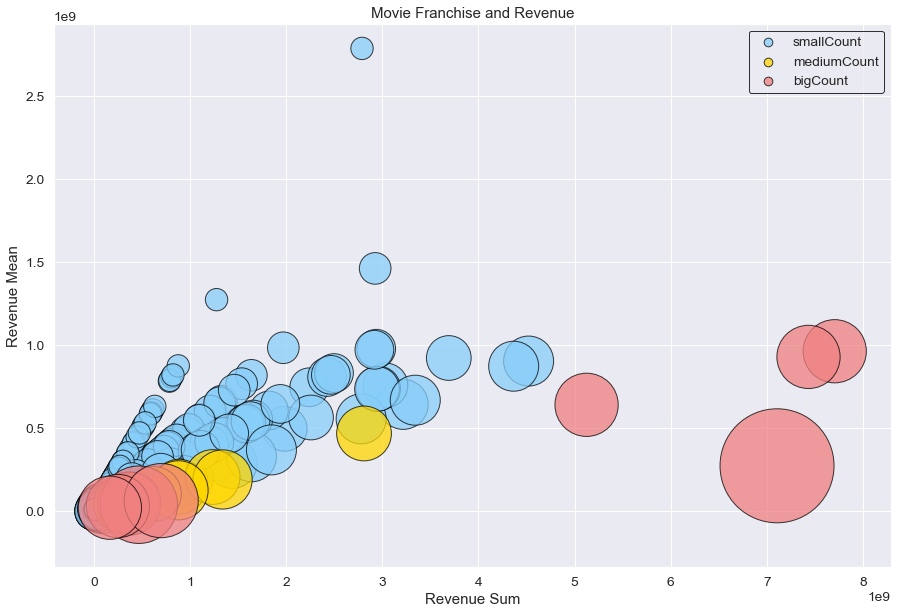

In [83]:
#color_scheme={'Dark Blue':'#0028FF','Light Blue':'#00A8FF','Green':'#A8FF00','Gold':'#FFD700','Orange':'#FF5700','Red':'#FF0028'}
#city_color={'oneVenues':color_scheme['Dark Blue'],'twoVenues':color_scheme['Light Blue'],'threeVenues':color_scheme['Green'],'fourVenues':color_scheme['Gold'],'fiveVenues':color_scheme['Orange'],'sixVenues':color_scheme['Red']}

color_scheme = {'Gold':'#FFD700', 'Light Sky Blue':'#87CEFA', 'Light Coral':'#F08080'}
franchise_color = {'Count <= 5': color_scheme['Light Sky Blue'], 
              'Count < 8': color_scheme['Gold'], 
              'Count >= 8':color_scheme['Light Coral']}

smallCount=fran_pivot[fran_pivot['count']<=5]
mediumCount=fran_pivot[(fran_pivot['count']>=6) & (fran_pivot['count']<8)]
bigCount=fran_pivot[fran_pivot['count']>=8]

1234589

plt.figure(figsize=(15,10))
plt.scatter(smallCount['sum'],smallCount['mean'],s=smallCount['count']*500,color=franchise_color['Count <= 5'],edgecolor='black',label='smallCount',alpha=0.75)
plt.scatter(mediumCount['sum'],mediumCount['mean'],s=mediumCount['count']*500,color=franchise_color['Count < 8'],edgecolor='black',label='mediumCount',alpha=0.75)
plt.scatter(bigCount['sum'],bigCount['mean'],s=bigCount['count']*500,color=franchise_color['Count >= 8'],edgecolor='black',label='bigCount',alpha=0.75)

plt.xlabel('Revenue Sum')
plt.ylabel('Revenue Mean')
plt.title('Movie Franchise and Revenue')
          
lgnd = plt.legend(frameon = True, edgecolor = 'black')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]

plt.savefig('../images/franchise4.png', bbox_inches='tight')
plt.show()

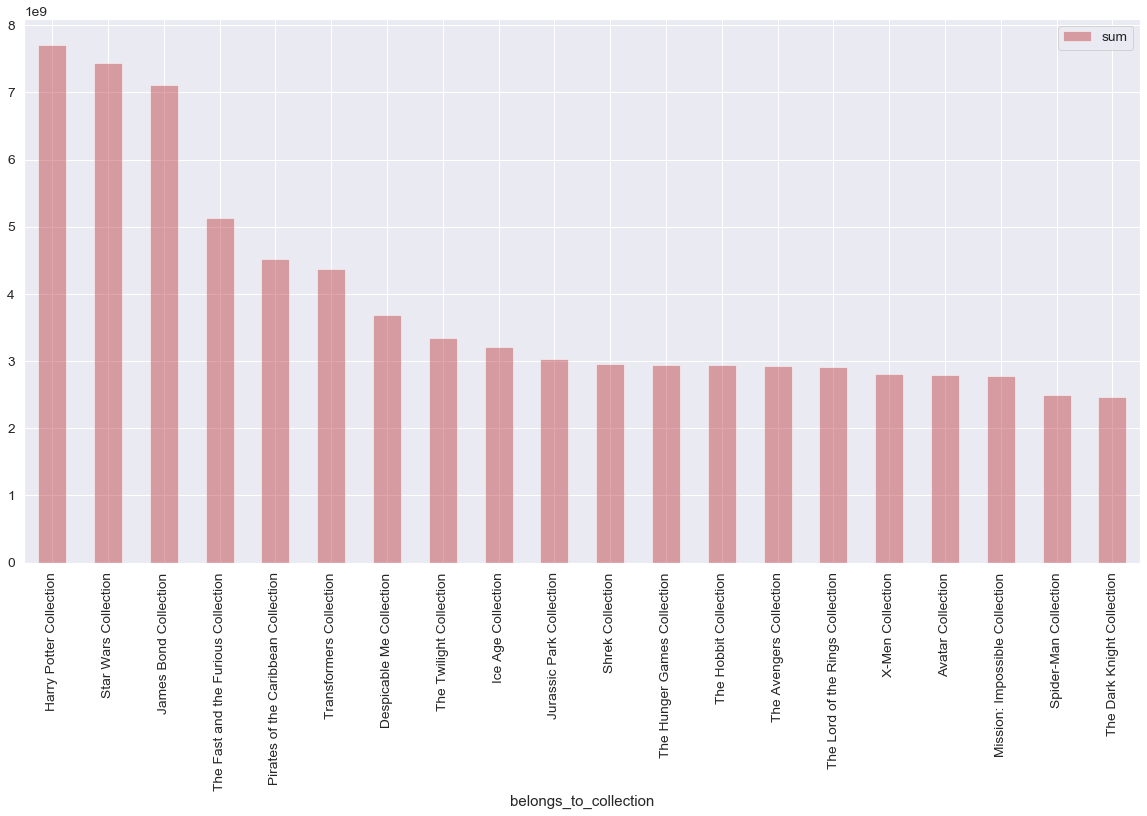

In [80]:
fran_pivot.sort_values('sum', ascending=False).head(20).plot(kind='bar',x='belongs_to_collection',y='sum',color='r',alpha=0.5,align="center",figsize=(20,10),rot=90)
plt.savefig('../images/franchise1.png', bbox_inches='tight')
plt.show()

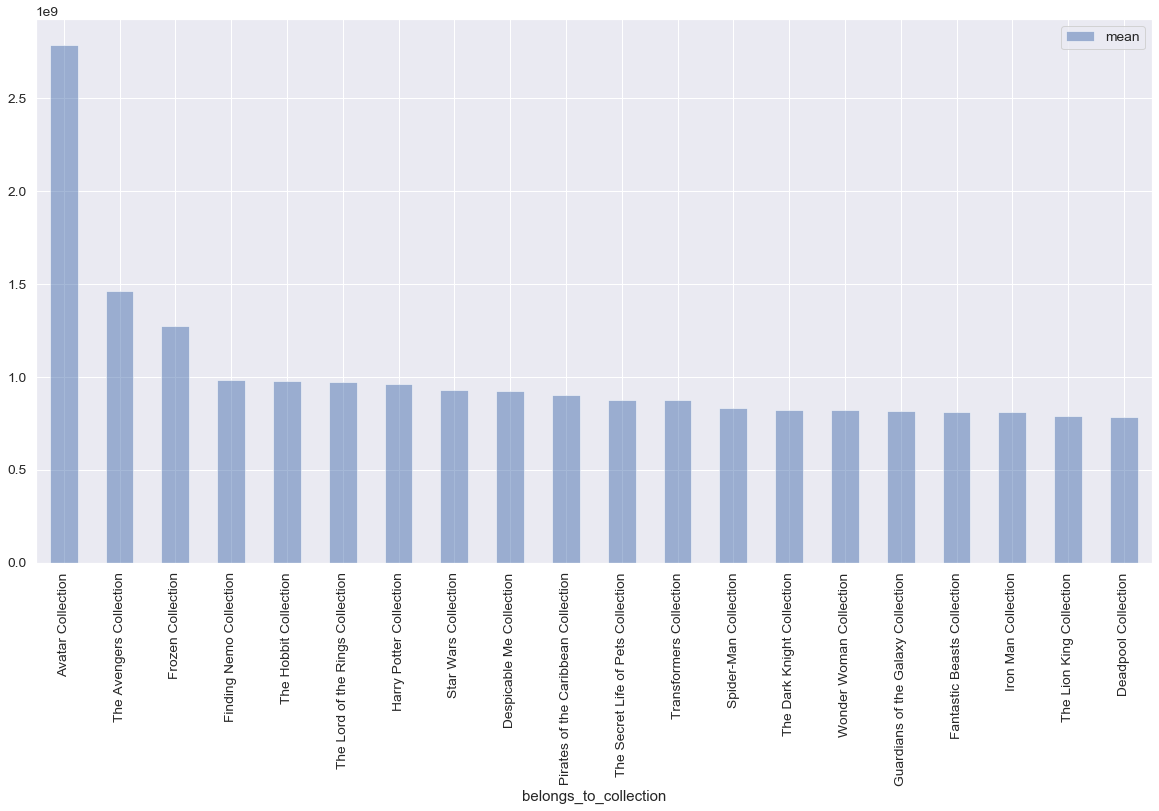

In [82]:
fran_pivot.sort_values('mean', ascending=False).head(20).plot(kind='bar',x='belongs_to_collection',y='mean',color='b',alpha=0.5,align="center",figsize=(20,10),rot=90)
plt.savefig('../images/franchise3.png', bbox_inches='tight')
plt.show()

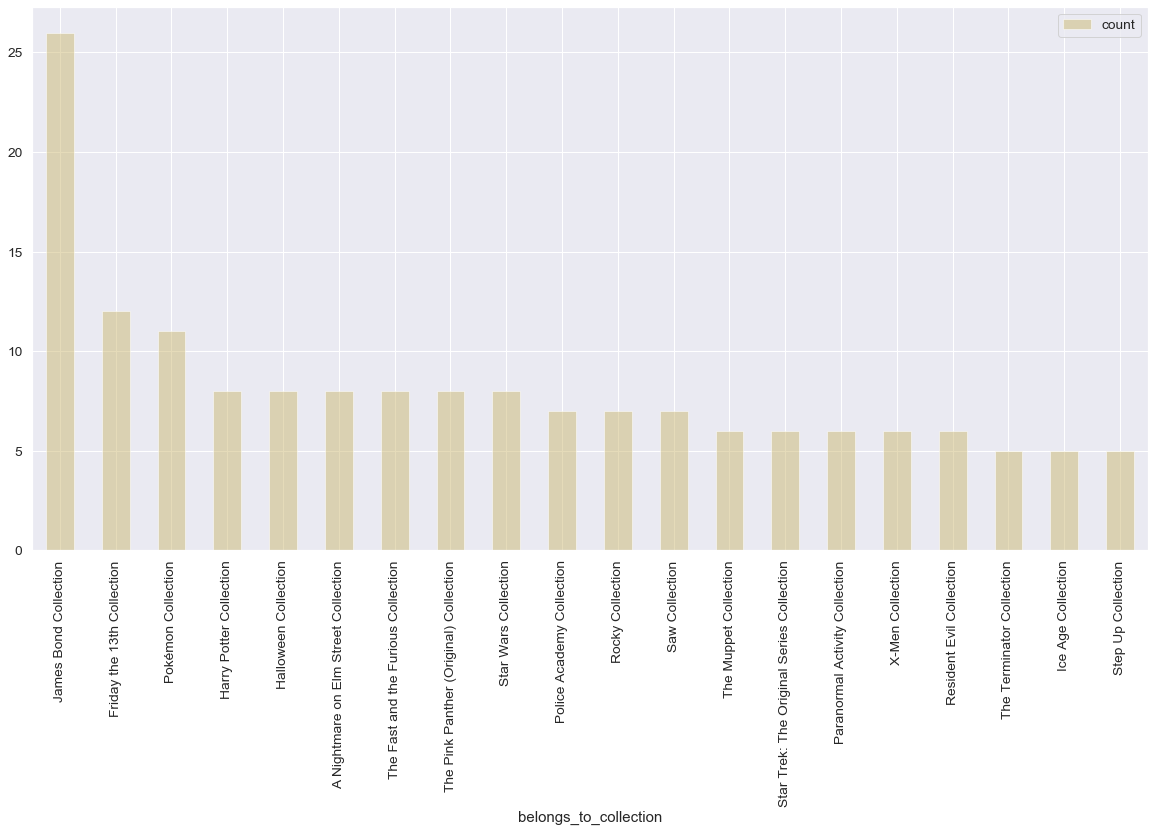

In [81]:
fran_pivot.sort_values('count', ascending=False).head(20).plot(kind='bar',x='belongs_to_collection',y='count',color='y',alpha=0.5,align="center",figsize=(20,10),rot=90)
plt.savefig('../images/franchise2.png', bbox_inches='tight')
plt.show()

### Production Company

In [128]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(ast.literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [129]:
s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [130]:
com_df = df.drop('production_companies', axis=1).join(s)

In [131]:
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [132]:
# Highest Earning Company
com_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
Warner Bros.,6.352519e+10,1.293792e+08,491
Universal Pictures,5.525919e+10,1.193503e+08,463
Paramount Pictures,4.880819e+10,1.235650e+08,395
Twentieth Century Fox Film Corporation,4.768775e+10,1.398468e+08,341
Walt Disney Pictures,4.083727e+10,2.778046e+08,147
Columbia Pictures,3.227974e+10,1.367785e+08,236
New Line Cinema,2.217339e+10,1.119868e+08,198
Amblin Entertainment,1.734372e+10,2.550547e+08,68
DreamWorks SKG,1.547575e+10,1.984071e+08,78
Dune Entertainment,1.500379e+10,2.419966e+08,62


In [134]:
# Most successful, highest on average company
com_pivot[com_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)

,Total,Average,Number
Pixar Animation Studios,1.118853e+10,6.215852e+08,18
Marvel Studios,1.169964e+10,6.157703e+08,19
Revolution Sun Studios,8.120339e+09,5.413559e+08,15
Lucasfilm,9.898421e+09,4.499282e+08,22
DreamWorks Animation,1.370752e+10,4.031622e+08,34
DC Entertainment,6.212609e+09,3.882880e+08,16
Dentsu,6.853205e+09,3.807336e+08,18
Jerry Bruckheimer Films,8.957441e+09,3.732267e+08,24
Marvel Enterprises,6.538067e+09,3.441088e+08,19
Legendary Pictures,1.346866e+10,3.367166e+08,40


### Genres

In [48]:
df['genres'] = df['genres'].fillna('[]').apply(ast.literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [49]:
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'

In [50]:
gen_df = df.drop('genres', axis=1).join(s)

In [51]:
# TMDB defines 32 different genres for our set of 45,000 movies. Let us now have a look at the most commonly occuring genres in movies.
gen_df['genre'].value_counts().shape[0]

32

In [52]:
pop_gen = pd.DataFrame(gen_df['genre'].value_counts()).reset_index()
pop_gen.columns = ['genre', 'movies']
pop_gen.head(10)

,genre,movies
0,Drama,20265
1,Comedy,13182
2,Thriller,7624
3,Romance,6735
4,Action,6596
5,Horror,4673
6,Crime,4307
7,Documentary,3932
8,Adventure,3496
9,Science Fiction,3049


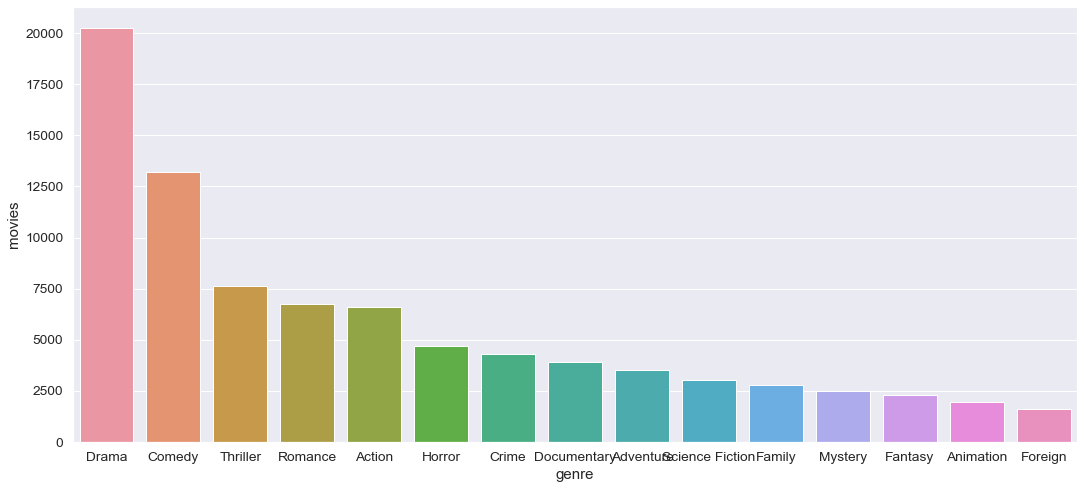

In [84]:
import seaborn as sns
plt.figure(figsize=(18,8))
sns.barplot(x='genre', y='movies', data=pop_gen.head(15))
plt.savefig('../images/genres1.png', bbox_inches='tight')
plt.show()

In [59]:
violin_genres = ['Drama', 'Comedy', 'Thriller', 'Romance', 'Action', 'Horror', 'Crime', 'Science Fiction', 'Fantasy', 'Animation']
violin_movies = gen_df[(gen_df['genre'].isin(violin_genres))]

<Figure size 1296x576 with 0 Axes>

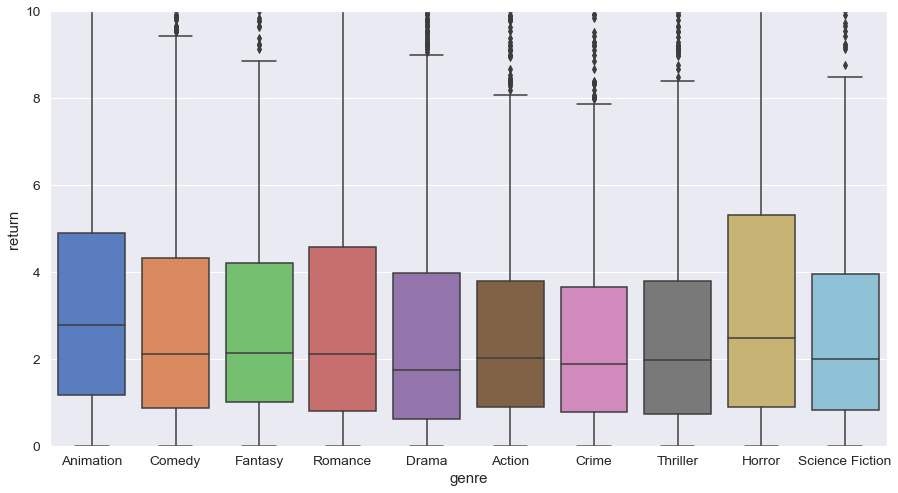

In [85]:
plt.figure(figsize=(18,8))
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 8))
sns.boxplot(x='genre', y='return', data=violin_movies, palette="muted", ax =ax)
ax.set_ylim([0, 10])
plt.savefig('../images/genres2.png', bbox_inches='tight')
plt.show()

In [75]:
webDF = df[['poster_path','title','tagline','release_date','original_language','vote_average','runtime','budget','revenue','return']]

In [61]:
df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'return', 'year'],
      dtype='object')

In [76]:
htmlTable = webDF.sort_values('revenue', ascending=False).head(100)

In [78]:
htmlTable.to_csv('../DataSet/htmlTable.csv', index = False)

In [77]:
htmlTable

,poster_path,title,tagline,release_date,original_language,vote_average,runtime,budget,revenue,return
14551,<img src='http://image.tmdb.org/t/p/w185//kmcq...,Avatar,Enter the World of Pandora.,2009-12-10,en,7.2,162.0,237000000.0,2.787965e+09,11.763566
26555,<img src='http://image.tmdb.org/t/p/w185//weUS...,Star Wars: The Force Awakens,Every generation has a story.,2015-12-15,en,7.5,136.0,245000000.0,2.068224e+09,8.441729
1639,<img src='http://image.tmdb.org/t/p/w185//kHXE...,Titanic,Nothing on Earth could come between them.,1997-11-18,en,7.5,194.0,200000000.0,1.845034e+09,9.225171
17818,<img src='http://image.tmdb.org/t/p/w185//cezW...,The Avengers,Some assembly required.,2012-04-25,en,7.4,143.0,220000000.0,1.519558e+09,6.907081
25084,<img src='http://image.tmdb.org/t/p/w185//jjBg...,Jurassic World,The park is open.,2015-06-09,en,6.5,124.0,150000000.0,1.513529e+09,10.090192
28830,<img src='http://image.tmdb.org/t/p/w185//dCgm...,Furious 7,Vengeance Hits Home,2015-04-01,en,7.3,137.0,190000000.0,1.506249e+09,7.927628
26558,<img src='http://image.tmdb.org/t/p/w185//t90Y...,Avengers: Age of Ultron,A New Age Has Come.,2015-04-22,en,7.3,141.0,280000000.0,1.405404e+09,5.019299
17437,<img src='http://image.tmdb.org/t/p/w185//fTpl...,Harry Potter and the Deathly Hallows: Part 2,It all ends here.,2011-07-07,en,7.9,130.0,125000000.0,1.342000e+09,10.736000
22110,<img src='http://image.tmdb.org/t/p/w185//jIjd...,Frozen,Only the act of true love will thaw a frozen h...,2013-11-27,en,7.3,102.0,150000000.0,1.274219e+09,8.494793
42222,<img src='http://image.tmdb.org/t/p/w185//tWqi...,Beauty and the Beast,Be our guest.,2017-03-16,en,6.8,129.0,160000000.0,1.262886e+09,7.893040
